# Bibliotecas

In [1]:
import pandas as pd

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

Classe principal

In [62]:
class StudentEDA:
    def __init__(self, path: str):
        """
        Classe para análise exploratória de dados de desempenho escolar.

        Parâmetros:
        path (str): Caminho para o arquivo CSV com os dados
        """
        # Carrega os dados e remove coluna StudentID
        self.df = pd.read_csv(path).drop(columns=['StudentID'], errors='ignore')

        # Decodifica colunas categóricas
        self.df = self._decode_categorical(self.df)

    def _decode_categorical(self, df) -> pd.DataFrame:
        """
        Decodifica colunas categóricas para labels legíveis.

        Parâmetros:
        df (pd.DataFrame): DataFrame original

        Retorna:
        pd.DataFrame: DataFrame com colunas decodificadas
        """
        mappings = {
            'Gender': {0: 'Masculino', 1: 'Feminino'},
            'Ethnicity': {0: 'Caucasiano', 1: 'Afro-americano', 2: 'Asiático', 3: 'Outro'},
            'ParentalEducation': {
                0: 'Nenhum',
                1: 'Ensino Médio',
                2: 'Superior Incompleto',
                3: 'Bacharelado',
                4: 'Pós-graduação'
            },
            'GradeClass': {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'F'}
        }

        df_copy = df.copy()
        for col, mapping in mappings.items():
            if col in df_copy.columns:
                df_copy[col] = df_copy[col].map(mapping)
        return df_copy

    def overview(self) -> None:
        """Exibe informações gerais sobre o dataset"""
        print("📊 Informações Gerais do Dataset:\n")
        display(self.df.info())

        print("\n📈 Estatísticas Descritivas:\n")
        display(self.df.describe(include='all'))

        print("\n🔍 Amostra de Dados:\n")
        display(self.df.head(3))

    def missing_values(self) -> None:
        """Identifica valores ausentes por coluna"""
        missing = self.df.isnull().sum()
        missing_percent = (missing / len(self.df)) * 100

        missing_df = pd.DataFrame({
            'Coluna': missing.index,
            'Ausentes': missing.values,
            '% do Total': missing_percent.round(2).values
        }).sort_values(by='Ausentes', ascending=False)

        if not missing_df[missing_df['Ausentes'] > 0].empty:
            print("\n🔍 Valores Ausentes por Coluna:")
            display(missing_df[missing_df['Ausentes'] > 0])
        else:
            print("\n✅ Nenhum valor ausente encontrado!")

    def duplicates_values(self) -> None:
        """Verifica a existência de linhas duplicadas"""
        duplicates = self.df.duplicated().sum()

        if duplicates > 0:
            print(f"\n⚠️ {duplicates} linhas duplicadas encontradas!")
            print("Amostra de duplicatas:")
            display(self.df[self.df.duplicated()].head(2))
        else:
            print("\n✅ Nenhuma duplicata encontrada!")

    def data_types(self) -> None:
        """Exibe os tipos de dados e valores únicos"""
        dtype_df = pd.DataFrame({
            'Coluna': self.df.columns,
            'Tipo': self.df.dtypes,
            'Valores Únicos': self.df.nunique()
        })

        print("\n📌 Tipos de Dados e Valores Únicos:\n")
        display(dtype_df)

    def performance_distribution(self) -> None:
        """Analisa a distribuição das notas dos alunos"""
        plt.figure(figsize=(10, 5))
        ax = sns.countplot(data=self.df, x='GradeClass',
                         order=['A', 'B', 'C', 'D', 'F'],
                         palette='viridis')

        # Adiciona anotações
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width()/2., height + 3,
                    f'{height}\n({height/len(self.df)*100:.1f}%)',
                    ha='center', va='bottom')

        plt.title('Distribuição das Notas dos Alunos')
        plt.xlabel('Classificação')
        plt.ylabel('Contagem')
        plt.show()

    def correlation_analysis(self, target: str = 'GPA') -> None:
        """Analisa correlações entre variáveis numéricas"""
        numeric_cols = self.df.select_dtypes(include='number').columns.tolist()

        # Remove colunas não relevantes
        exclude_cols = ['Gender', 'Ethnicity']
        numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

        if target not in numeric_cols:
            print(f"⚠️ Coluna alvo '{target}' não encontrada!")
            return

        corr = self.df[numeric_cols].corr()

        print(f"\n📊 Correlações com {target}:")
        display(corr[[target]].sort_values(by=target, ascending=False))

        plt.figure(figsize=(10, 6))
        sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
        plt.title('Mapa de Calor de Correlações')
        plt.show()

    def extracurricular_impact(self) -> None:
        """Analisa o impacto de atividades extracurriculares"""
        activities = ['Sports', 'Music', 'Volunteering']

        plt.figure(figsize=(15, 5))
        for i, activity in enumerate(activities, 1):
            plt.subplot(1, 3, i)
            sns.boxplot(data=self.df, x=activity, y='GPA', palette='Set2')
            plt.title(f'GPA por Participação em\n{activity}')
        plt.tight_layout()
        plt.show()

    def ethnicity_analysis(self) -> None:
        """Analisa diferenças por etnia"""
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=self.df, x='Ethnicity', y='GPA',
                  order=['Caucasiano', 'Afro-americano', 'Asiático', 'Outro'],
                  palette='pastel')
        plt.title('Distribuição do GPA por Etnia')
        plt.xticks(rotation=45)
        plt.show()

    def parental_education_impact(self) -> None:
        """Analisa o impacto da educação dos pais"""
        plt.figure(figsize=(10, 6))
        order = ['Nenhum', 'Ensino Médio', 'Superior Incompleto',
                'Bacharelado', 'Pós-graduação']

        sns.barplot(data=self.df, x='ParentalEducation', y='GPA',
                   order=order, ci=None, palette='mako')

        plt.title('Média de GPA por Nível de Educação dos Pais')
        plt.xlabel('Nível de Educação')
        plt.ylabel('Média de GPA')
        plt.xticks(rotation=45)
        plt.show()

# Main

In [64]:
eda = StudentEDA('/content/Student_performance_data _.csv')

📊 Informações Gerais do Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   object 
 2   Ethnicity          2392 non-null   object 
 3   ParentalEducation  2392 non-null   object 
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   int64  
 7   ParentalSupport    2392 non-null   int64  
 8   Extracurricular    2392 non-null   int64  
 9   Sports             2392 non-null   int64  
 10  Music              2392 non-null   int64  
 11  Volunteering       2392 non-null   int64  
 12  GPA                2392 non-null   float64
 13  GradeClass         2392 non-null   object 
dtypes: float64(2), int64(8), object(4)
memory usage: 261.8+ KB


None


📈 Estatísticas Descritivas:



,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392,2392,2392,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392
unique,NaN,2,4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,Feminino,Caucasiano,Superior Incompleto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F
freq,NaN,1222,1207,934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1211
mean,16.468645,NaN,NaN,NaN,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,NaN
std,1.123798,NaN,NaN,NaN,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,NaN
min,15.000000,NaN,NaN,NaN,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,15.000000,NaN,NaN,NaN,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,NaN
50%,16.000000,NaN,NaN,NaN,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,NaN
75%,17.000000,NaN,NaN,NaN,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,NaN



🔍 Amostra de Dados:



,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,Feminino,Caucasiano,Superior Incompleto,19.833723,7,1,2,0,0,1,0,2.929196,C
1,18,Masculino,Caucasiano,Ensino Médio,15.408756,0,0,1,0,0,0,0,3.042915,B
2,15,Masculino,Asiático,Bacharelado,4.210570,26,0,2,0,0,0,0,0.112602,F



✅ Nenhum valor ausente encontrado!

✅ Nenhuma duplicata encontrada!

📌 Tipos de Dados e Valores Únicos:



,Coluna,Tipo,Valores Únicos
Age,Age,int64,4
Gender,Gender,object,2
Ethnicity,Ethnicity,object,4
ParentalEducation,ParentalEducation,object,5
StudyTimeWeekly,StudyTimeWeekly,float64,2392
Absences,Absences,int64,30
Tutoring,Tutoring,int64,2
ParentalSupport,ParentalSupport,int64,5
Extracurricular,Extracurricular,int64,2
Sports,Sports,int64,2


<ipython-input-62-376a43d50112>:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=self.df, x='GradeClass',


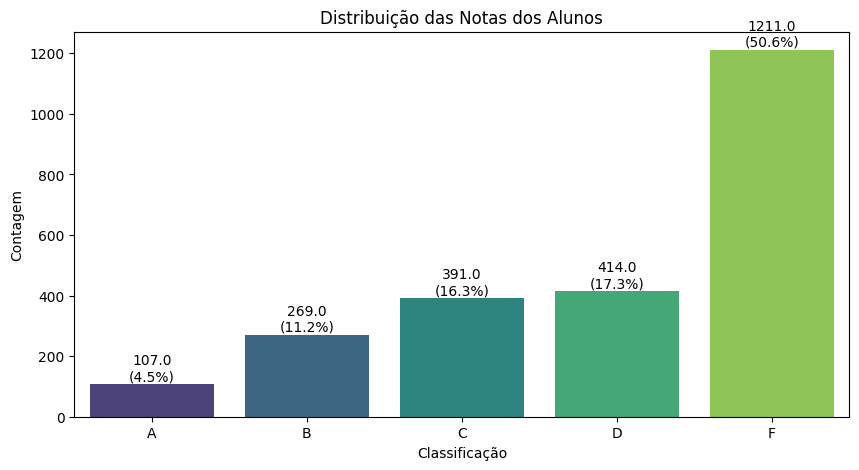


📊 Correlações com GPA:


,GPA
GPA,1.000000
ParentalSupport,0.190774
StudyTimeWeekly,0.179275
Tutoring,0.145119
Extracurricular,0.094078
Music,0.073318
Sports,0.057859
Volunteering,0.003258
Age,0.000275
Absences,-0.919314


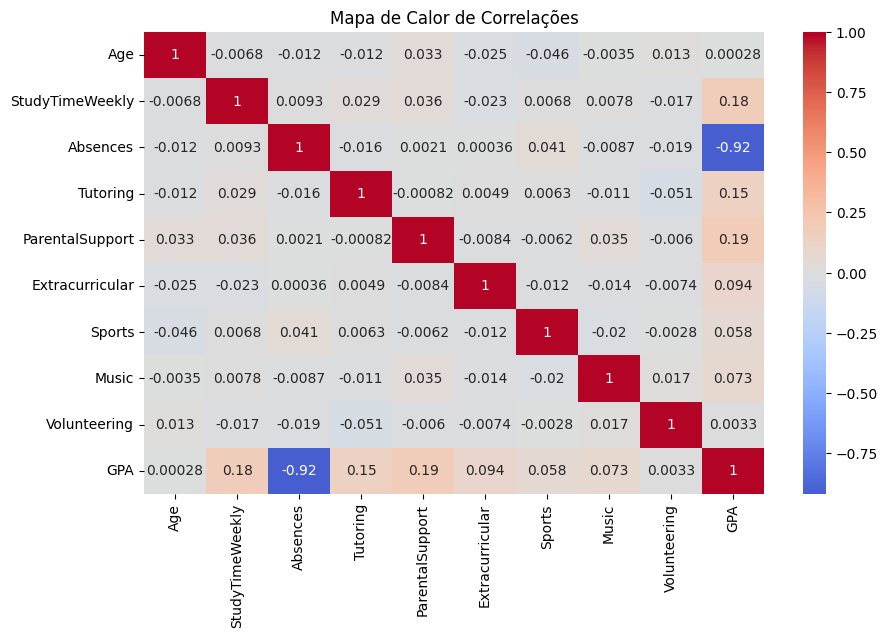

<ipython-input-62-376a43d50112>:142: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=self.df, x=activity, y='GPA', palette='Set2')
<ipython-input-62-376a43d50112>:142: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=self.df, x=activity, y='GPA', palette='Set2')
<ipython-input-62-376a43d50112>:142: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=self.df, x=activity, y='GPA', palette='Set2')


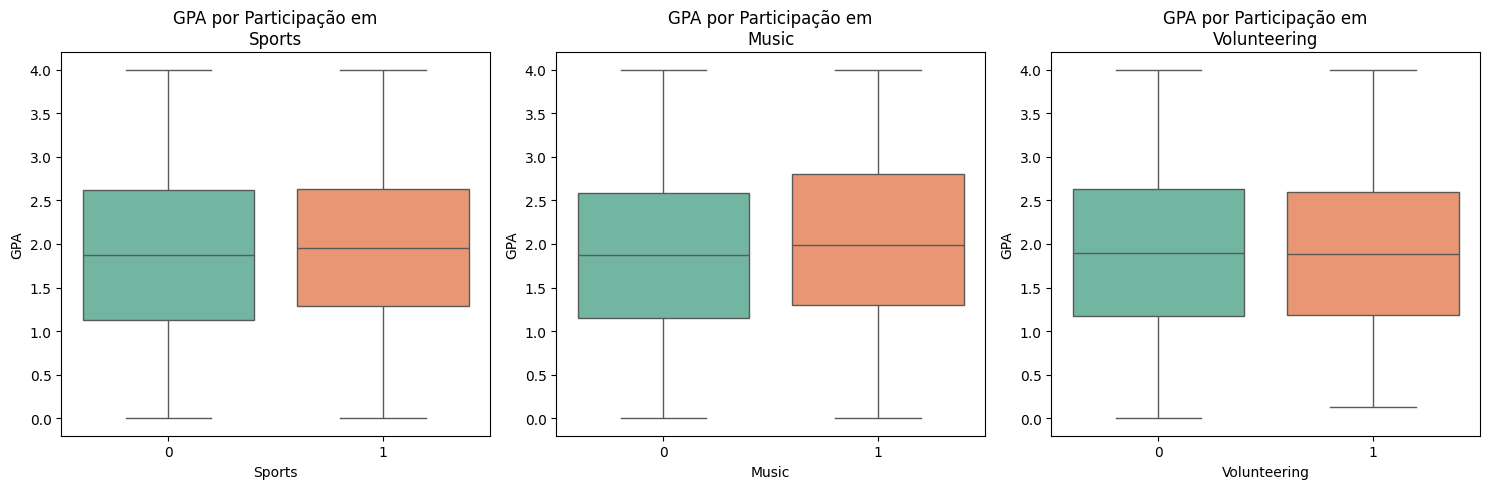

<ipython-input-62-376a43d50112>:150: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=self.df, x='Ethnicity', y='GPA',


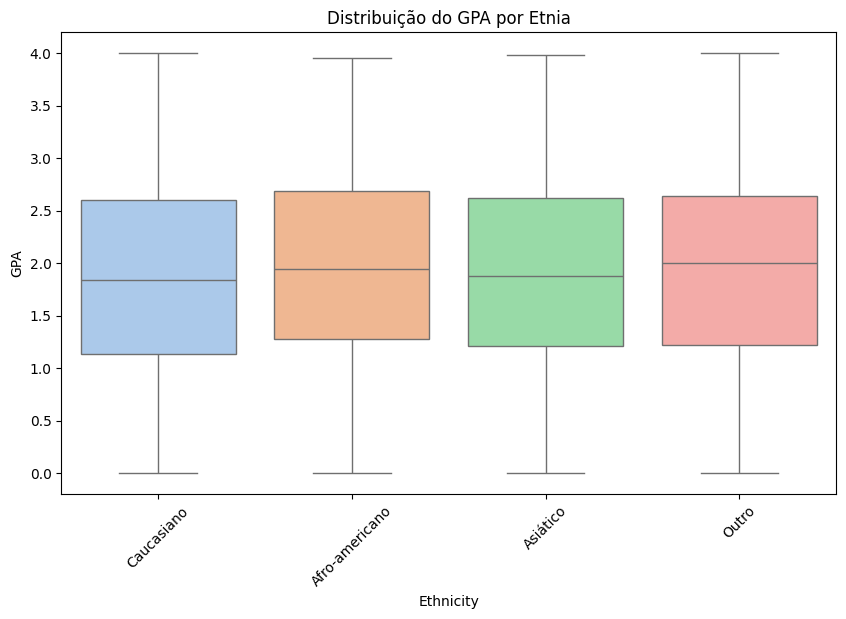

<ipython-input-62-376a43d50112>:163: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=self.df, x='ParentalEducation', y='GPA',
<ipython-input-62-376a43d50112>:163: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=self.df, x='ParentalEducation', y='GPA',


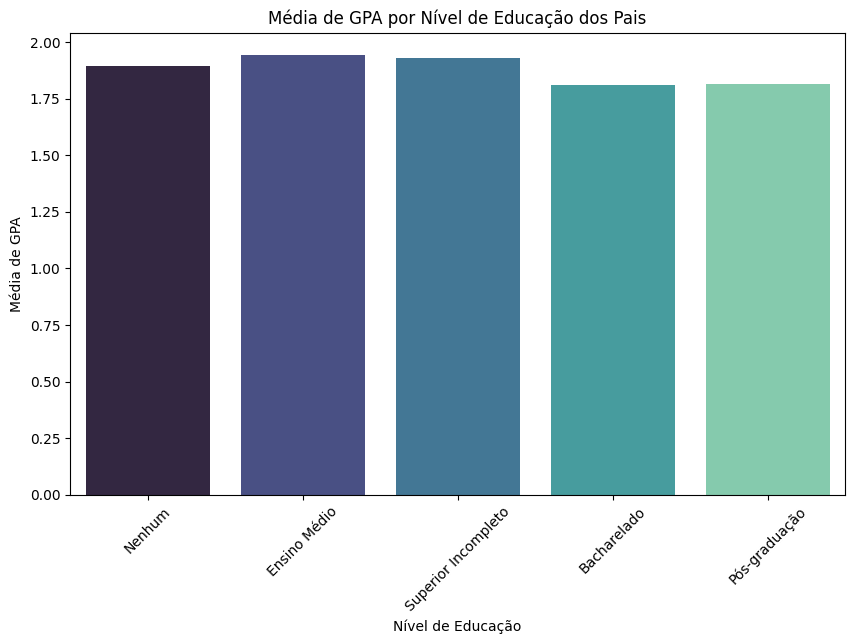

In [65]:
eda.overview()
eda.missing_values()
eda.duplicates_values()
eda.data_types()
eda.performance_distribution()
eda.correlation_analysis(target='GPA')
eda.extracurricular_impact()
eda.ethnicity_analysis()
eda.parental_education_impact()